In [1]:
# Imports

import numpy as np
import pandas as pd
import random
from vector3d import vector, point
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM, Masking
 

# Pandas Dataframes max width and length set to infinity
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

In [2]:
# Reading Excel File

rawDF = pd.read_excel('KinectDatasetRaw.xlsx')

print(rawDF.shape)
rawDF.head()

(70100, 6)


,UserId,SessionId,ExerciseId,PracticeId,FrameId,JointsData
0,Saif,1654006662,DeadLift,0,1,"0.4814294,0.7924047,3.117715;0.5046099,0.2022265,2.935158;0.4993083,0.1522294,2.852451;0.5703295,0.0945717,2.807425;0.428959,0.07979673,2.8313;0.4972522,0.6036246,3.066182;0.6500524,0.4836177,3.002079;0.3312287,0.4597363,3.026507;0.7610644,0.200289,2.907292;0.277955,0.1965074,2.932976;0.7746434,0.001606748,2.769233;0.259018,-0.007442489,2.804648;0.7885954,-0.0789313,2.700444;0.2579123,-0.09421908,2.742345;0.6544638,-0.4209295,2.72457;0.3652332,-0.4087494,2.716898;0.6977546,-0.7564449,2.657352;0.3398131,-0.7549222,2.641534;0.69943,-0.8375218,2.582419;0.3303724,-0.8341905,2.563865;"
1,Saif,1654006662,DeadLift,0,2,"0.482266,0.7907166,3.117144;0.5045525,0.2020836,2.935162;0.4994116,0.1520642,2.852469;0.5706298,0.093982,2.80748;0.4291857,0.0795233,2.831281;0.4964528,0.6030762,3.065578;0.6511206,0.4830902,3.002354;0.3313029,0.4593014,3.026345;0.7607896,0.2000545,2.907408;0.2778639,0.1960593,2.933084;0.7744109,0.001761741,2.768598;0.258862,-0.007612348,2.80424;0.7891418,-0.07783721,2.698895;0.257804,-0.09445272,2.742037;0.6544689,-0.4209337,2.724637;0.3652196,-0.4087734,2.716877;0.6977593,-0.7564439,2.657344;0.3398358,-0.7549237,2.641386;0.6994249,-0.8374339,2.582646;0.3314818,-0.8386331,2.55906;"
2,Saif,1654006662,DeadLift,0,3,"0.4821737,0.7908555,3.117366;0.5049147,0.2023427,2.935588;0.4994991,0.1524327,2.853128;0.5705183,0.09413236,2.807599;0.4294688,0.07958002,2.832727;0.4970059,0.6029796,3.065522;0.6510404,0.4830699,3.002284;0.3303162,0.4607298,3.028507;0.7607902,0.2000522,2.907413;0.2779656,0.1958603,2.932949;0.7747161,0.001355856,2.768258;0.2588494,-0.007489145,2.803522;0.7885464,-0.07812186,2.698243;0.2576272,-0.09460888,2.741725;0.6544939,-0.4203371,2.72425;0.3652532,-0.4095296,2.716636;0.6975303,-0.7568626,2.656587;0.3405557,-0.7544452,2.639863;0.6994531,-0.8372166,2.582613;0.331638,-0.8387995,2.558717;"
3,Saif,1654006662,DeadLift,0,4,"0.4822835,0.791223,3.118004;0.5050852,0.2025819,2.93564;0.4996131,0.1528521,2.853238;0.5708315,0.09460831,2.807613;0.4294541,0.07975966,2.832776;0.4969899,0.6029487,3.065506;0.6510391,0.4827522,3.002081;0.3299578,0.4615878,3.0296;0.7607302,0.1999085,2.907367;0.2780123,0.1959888,2.933106;0.7749763,0.001456522,2.768017;0.2588072,-0.007124081,2.803247;0.787757,-0.07755709,2.697291;0.2575786,-0.09427212,2.741503;0.6543502,-0.4203648,2.723944;0.3655519,-0.4096657,2.71605;0.6972893,-0.7568219,2.656464;0.3409204,-0.7549456,2.638586;0.6994928,-0.8369429,2.582778;0.3315756,-0.83843,2.558643;"
4,Saif,1654006662,DeadLift,0,5,"0.4832454,0.7922127,3.118238;0.5052814,0.2026688,2.93591;0.4997425,0.1530353,2.85347;0.5710381,0.09480111,2.807713;0.429414,0.07989202,2.832972;0.4976626,0.6029163,3.066414;0.6512086,0.4828738,3.00213;0.3302236,0.4611475,3.029373;0.7608253,0.1999436,2.907541;0.2779792,0.1972572,2.933794;0.7748142,0.00221166,2.767908;0.2593382,-0.005698606,2.80354;0.7770513,-0.03983369,2.721108;0.2575351,-0.09266837,2.741533;0.653912,-0.4205916,2.722733;0.3662158,-0.4085275,2.714696;0.6973224,-0.7567881,2.656394;0.3412834,-0.7546768,2.638567;0.6994622,-0.8369485,2.582791;0.3316098,-0.8382762,2.558753;"


In [3]:
# Functions for parsing frame joints-data text and convert it to np array

def parseJointsDataStringToArray(jointsData):
    jointsData = jointsData[:-1] # the :-1 is to remove the last ";" in the string
    jointsData = jointsData.split(";")
    jointsArray = [x.split(",") for x in jointsData]
    jointsNpArray = np.asarray(jointsArray, dtype=np.float32)
    return jointsNpArray

# Function for plotting frame joints on a 3D GRID

def plotJointsDataIn3D(joints):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    xData = [joint[0] for joint in joints]
    yData = [joint[1] for joint in joints]
    zData = [joint[2] for joint in joints]
    scatter_plot = ax.scatter3D(xData, yData, zData, c=zData, cmap="Reds")
    plt.colorbar(scatter_plot)

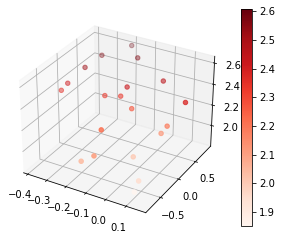

In [4]:
# Plotting JointsData for any random frame

randomIndex = random.randint(0, rawDF.shape[0])
randomJointsData = rawDF.iloc[randomIndex, 5]
randomJointsData = parseJointsDataStringToArray(randomJointsData)
plotJointsDataIn3D(randomJointsData)

In [5]:
# Functions for parsing frame joints-data text and convert it to 2D array of angles


# Indexes of joints in each array
ShoulderCenter = 5
ShoulderLeft = 7
ShoulderRight = 6
ElbowLeft = 9
ElbowRight = 8
WristLeft = 11
WristRight = 10
Spine = 1
HipCenter = 2
HipLeft = 4
HipRight = 3
KneeLeft = 15
KneeRight = 14
AnkleLeft = 17
AnkleRight = 16


def getAnglesFromJointsPoints(points):
    anglesArray = []
    # 0 ShoulderSpineLeft
    vShoulderCenterToSpine = vector.from_points(points[ShoulderCenter], points[Spine])
    vShoulderCenterToShoulderLeft = vector.from_points(points[ShoulderCenter], points[ShoulderLeft])
    anglesArray.append(vector.angle(vShoulderCenterToSpine, vShoulderCenterToShoulderLeft))
    # 1 ShoulderSpineRight
    vShoulderCenterToSpine = vector.from_points(points[ShoulderCenter], points[Spine])
    vShoulderCenterToShoulderRight = vector.from_points(points[ShoulderCenter], points[ShoulderRight])
    anglesArray.append(vector.angle(vShoulderCenterToSpine, vShoulderCenterToShoulderRight))
    # 2 ShoulderElbowLeft
    vShoulderLeftToShoulderCenter = vector.from_points(points[ShoulderLeft], points[ShoulderCenter])
    vShoulderLeftToElbowLeft = vector.from_points(points[ShoulderLeft], points[ElbowLeft])
    anglesArray.append(vector.angle(vShoulderLeftToShoulderCenter, vShoulderLeftToElbowLeft))
    # 3 ShoulderElbowRight
    vShoulderRightToShoulderCenter = vector.from_points(points[ShoulderRight], points[ShoulderCenter])
    vShoulderRightToElbowRight = vector.from_points(points[ShoulderRight], points[ElbowRight])
    anglesArray.append(vector.angle(vShoulderRightToShoulderCenter, vShoulderRightToElbowRight))
    # 4 ElbowWristLeft
    vElbowLeftToShoulderLeft = vector.from_points(points[ElbowLeft], points[ShoulderLeft])
    vElbowLeftToWristLeft = vector.from_points(points[ElbowLeft], points[WristLeft])
    anglesArray.append(vector.angle(vElbowLeftToShoulderLeft, vElbowLeftToWristLeft))
    # 5 ElbowWristRight
    vElbowRightToShoulderRight = vector.from_points(points[ElbowRight], points[ShoulderRight])
    vElbowRightToWristRight = vector.from_points(points[ElbowRight], points[WristRight])
    anglesArray.append(vector.angle(vElbowRightToShoulderRight, vElbowRightToWristRight))
    # 6 HipLeftRight
    vHipCenterToHipLeft = vector.from_points(points[HipCenter], points[HipLeft])
    vHipCenterToHipRight = vector.from_points(points[HipCenter], points[HipRight])
    anglesArray.append(vector.angle(vHipCenterToHipLeft, vHipCenterToHipRight))
    # 7 HipKneeLeft
    vHipLeftToHipCenter = vector.from_points(points[HipLeft], points[HipCenter])
    vHipLeftToKneeLeft = vector.from_points(points[HipLeft], points[KneeLeft])
    anglesArray.append(vector.angle(vHipLeftToHipCenter, vHipLeftToKneeLeft))
    # 8 HipKneeRight
    vHipRightToHipCenter = vector.from_points(points[HipRight], points[HipCenter])
    vHipRightToKneeRight = vector.from_points(points[HipRight], points[KneeRight])
    anglesArray.append(vector.angle(vHipRightToHipCenter, vHipRightToKneeRight))
    # 9 KneeAnkleLeft
    vKneeLeftToHipLeft = vector.from_points(points[KneeLeft], points[HipLeft])
    vKneeLeftToAnkleLeft = vector.from_points(points[KneeLeft], points[AnkleLeft])
    anglesArray.append(vector.angle(vKneeLeftToHipLeft, vKneeLeftToAnkleLeft))
    # 10 KneeAnkleRight
    vKneeRightToHipRight = vector.from_points(points[KneeRight], points[HipRight])
    vKneeRightToAnkleRight = vector.from_points(points[KneeRight], points[AnkleRight])
    anglesArray.append(vector.angle(vKneeRightToHipRight, vKneeRightToAnkleRight))
    
    return np.asarray(anglesArray, dtype=np.float32)

def getPointFromCoordinates(joint):
    return point.Point(joint[0], joint[1], joint[2])

def convertJointsArrayToAngles(jointsNpArray):
    pointsNpArray = np.apply_along_axis(getPointFromCoordinates, 1, jointsNpArray)
    anglesNpArray = getAnglesFromJointsPoints(pointsNpArray)
    return anglesNpArray
    
def convertJointsDataStringToAngles(jointsData):
    jointsNpArray = parseJointsDataStringToArray(jointsData)
    anglesNpArray = convertJointsArrayToAngles(jointsNpArray)
    return anglesNpArray

In [7]:
# Exchanging all rows JointsData strings with arrays

parsedDF = rawDF.copy()
parsedDF["JointsData"] = rawDF["JointsData"].apply(convertJointsDataStringToAngles)
parsedDF.head()
#parsedDF.iloc[0:65, :]

,UserId,SessionId,ExerciseId,PracticeId,FrameId,JointsData
0,Saif,1654006662,DeadLift,0,1,"[49.096924, 48.10688, 142.59064, 151.01361, 166.00223, 156.60983, 89.279, 144.14069, 136.98877, 176.7412, 177.08286]"
1,Saif,1654006662,DeadLift,0,2,"[49.09592, 48.38968, 142.72464, 150.47006, 165.82341, 156.66481, 89.10329, 144.26427, 137.11855, 176.71, 177.09433]"
2,Saif,1654006662,DeadLift,0,3,"[49.75652, 48.3232, 141.6848, 150.57803, 166.11566, 156.68488, 88.90148, 144.43335, 137.25139, 176.6225, 177.0632]"
3,Saif,1654006662,DeadLift,0,4,"[50.07845, 48.23221, 141.24773, 150.6403, 166.18285, 156.67926, 88.95192, 144.43575, 137.11784, 176.65497, 177.13203]"
4,Saif,1654006662,DeadLift,0,5,"[49.93487, 48.19204, 141.48196, 150.68759, 165.93085, 156.5273, 89.013306, 144.32736, 137.07256, 176.63373, 177.47087]"


In [8]:
# Splitting Dataframes by Excercises

DeadLiftDF = parsedDF.loc[parsedDF["ExerciseId"] == "DeadLift"].reset_index(drop=True)
TwistDF = parsedDF.loc[parsedDF["ExerciseId"] == "Twist"].reset_index(drop=True)
LateralRaiseDF = parsedDF.loc[parsedDF["ExerciseId"] == "LateralRaise"].reset_index(drop=True)
NoiseDF = parsedDF.loc[parsedDF["ExerciseId"] == "Noise"].reset_index(drop=True)

In [9]:
# Function for Splitting Dataframes by practicies

def splitDfByPractices(df):
    splittedDfs = []
    lastSplitIndex = 0
    currentPracticeNo = 0
    if df.empty == False:
        currentPracticeNo = df.iloc[0, 3]
    for i in df.index:
        if df.iloc[i, 3] != currentPracticeNo or i == len(df)-1:
            practice = df.iloc[lastSplitIndex:(i+1 if i == len(df)-1 else i), :]
            splittedDfs.append(practice)
            currentPracticeNo =  df.iloc[i, 3]
            lastSplitIndex = i
    random.shuffle(splittedDfs) # Shuffling DFs to prepare it for the Train/Test sets Splitting
    return splittedDfs

# Splitting Dataframes by practicies

splittedDeadliftDFs = splitDfByPractices(DeadLiftDF)
print("DeadLift Practices", len(splittedDeadliftDFs))

splittedTwistDFs = splitDfByPractices(TwistDF)
print("Twist Practices", len(splittedTwistDFs))

splittedLateralRaiseDFs = splitDfByPractices(LateralRaiseDF)
print("LateralRaise Practices", len(splittedLateralRaiseDFs))

splittedNoiseDFs = splitDfByPractices(NoiseDF)
print("Noise Practices", len(splittedNoiseDFs))

DeadLift Practices 200
Twist Practices 219
LateralRaise Practices 203
Noise Practices 217


In [10]:
# Converting Dataframes to Dimensional array with dropping all columns except joints data

def stackDfsintoNpArray(DFs, maxTimeSteps, paddingMaskValue):
    rows = len(DFs)
     # 11 is the numer of features (angles) per frame (Timestep)
    array = np.full((rows,maxTimeSteps,11), paddingMaskValue, dtype=np.float32)
    for i in range(rows):
        dfToNp = DFs[i]['JointsData'].to_numpy()
        for j in range(len(dfToNp)):
            array[i:i+1, j:j+1, 0:len(dfToNp[j])] = dfToNp[j]
    return array
        
stackedDeadLifts = stackDfsintoNpArray(splittedDeadliftDFs, 256, -1)
print("DeadLift array", stackedDeadLifts.shape)

stackedTwists = stackDfsintoNpArray(splittedTwistDFs, 256, -1)
print("twist array", stackedTwists.shape)

stackedLateralRaises = stackDfsintoNpArray(splittedLateralRaiseDFs, 256, -1)
print("LateralRaise array", stackedLateralRaises.shape)

stackedNoise = stackDfsintoNpArray(splittedNoiseDFs, 256, -1)
print("Noise array", stackedNoise.shape)

DeadLift array (200, 256, 11)
twist array (219, 256, 11)
LateralRaise array (203, 256, 11)
Noise array (217, 256, 11)


In [11]:
# Preparing dataset

# Splitting array to train/Test arrays

def splitTrainTestByRatio(X, Y, ratio):
    splitAt = int(ratio * X.shape[0])
    trainX, testX = X[:splitAt, :, :], X[splitAt:, :, :]
    trainY, testY = Y[:splitAt], Y[splitAt:]
    return trainX, trainY, testX, testY

# Making output array
noiseOutput = np.full(len(splittedNoiseDFs), 0)
deadLiftOutput = np.full(len(splittedDeadliftDFs), 1)
twistOutput = np.full(len(splittedTwistDFs), 2)
lateralRaiseOutput = np.full(len(splittedLateralRaiseDFs), 3)

# Splitting Train/Test by 80% : 20%
ratio = 0.8 

trainXDeadLift, trainYDeadLift, testXDeadLift, testYDeadLift = splitTrainTestByRatio(stackedDeadLifts, deadLiftOutput, ratio)
print("DeadLift train/Test", trainXDeadLift.shape, trainYDeadLift.shape, testXDeadLift.shape, testYDeadLift.shape)

trainXTwist, trainYTwist, testXTwist, testYTwist = splitTrainTestByRatio(stackedTwists, twistOutput, ratio)
print("Twist train/Test", trainXTwist.shape, trainYTwist.shape, testXTwist.shape, testYTwist.shape)

trainXLatRaise, trainYLatRaise, testXLatRaise, testYLatRaise = splitTrainTestByRatio(stackedLateralRaises, lateralRaiseOutput, ratio)
print("LateralRaise train/Test", trainXLatRaise.shape, trainYLatRaise.shape, testXLatRaise.shape, testYLatRaise.shape)

trainXNoise, trainYNoise, testXNoise, testYNoise = splitTrainTestByRatio(stackedNoise, noiseOutput, ratio)
print("Noise train/Test", trainXNoise.shape, trainYNoise.shape, testXNoise.shape, testYNoise.shape)


# Concating arrays together
fullTrainX = np.concatenate([trainXDeadLift, trainXTwist, trainXLatRaise, trainXNoise])
fullTrainY = np.concatenate([trainYDeadLift, trainYTwist, trainYLatRaise, trainYNoise])
fullTrainY = to_categorical(fullTrainY)
print("full Training Set", fullTrainX.shape, fullTrainY.shape)
fullTestX = np.concatenate([testXDeadLift, testXTwist, testXLatRaise, testXNoise])
fullTestY = np.concatenate([testYDeadLift, testYTwist, testYLatRaise, testYNoise])
fullTestY = to_categorical(fullTestY)
print("full Test Set", fullTestX.shape, fullTestY.shape)


DeadLift train/Test (160, 256, 11) (160,) (40, 256, 11) (40,)
Twist train/Test (175, 256, 11) (175,) (44, 256, 11) (44,)
LateralRaise train/Test (162, 256, 11) (162,) (41, 256, 11) (41,)
Noise train/Test (173, 256, 11) (173,) (44, 256, 11) (44,)
full Training Set (670, 256, 11) (670, 4)
full Test Set (169, 256, 11) (169, 4)


In [13]:
# Training and fiting model

def trainAndEvaluateModel():
    n_timesteps, n_features, n_outputs = fullTrainX.shape[1], fullTrainX.shape[2], fullTrainY.shape[1]
    input_shape=(n_timesteps, n_features)
    # Model Structure
    model = Sequential()
    model.add(Masking(mask_value=-1, input_shape=input_shape))
    model.add(LSTM(100, input_shape=input_shape))
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # Model Trainig
    model.fit(fullTrainX, fullTrainY, epochs=15, batch_size=64, verbose=0)
    # Evaluate model
    _, accuracy = model.evaluate(fullTestX, fullTestY, batch_size=64, verbose=0)
    return { "model" : model, "accuracy" : accuracy}

# Repeat experiment
repeats = 10
modelsScores = list()
scores = list()
for r in range(repeats):
    modelsScore = trainAndEvaluateModel()
    modelsScores.append(modelsScore)
    score = modelsScore["accuracy"] * 100.0
    scores.append(score)
    print('>#%d: %.3f' % (r+1, score))
    
# Show Summary
print(scores)
m, s = np.mean(scores), np.std(scores)
print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))

Epoch 1/15
11/11 [==============================] - 3s 88ms/step - loss: 1.3552 - accuracy: 0.3925
Epoch 2/15
11/11 [==============================] - 1s 87ms/step - loss: 1.0457 - accuracy: 0.6254
Epoch 3/15
11/11 [==============================] - 1s 88ms/step - loss: 0.9505 - accuracy: 0.6254
Epoch 4/15
11/11 [==============================] - 1s 86ms/step - loss: 0.7856 - accuracy: 0.6925
Epoch 5/15
11/11 [==============================] - 1s 87ms/step - loss: 0.7261 - accuracy: 0.7254
Epoch 6/15
11/11 [==============================] - 1s 89ms/step - loss: 0.6566 - accuracy: 0.7134
Epoch 7/15
11/11 [==============================] - 1s 89ms/step - loss: 0.6198 - accuracy: 0.7478
Epoch 8/15
11/11 [==============================] - 1s 90ms/step - loss: 0.5447 - accuracy: 0.8149
Epoch 9/15
11/11 [==============================] - 1s 89ms/step - loss: 0.5344 - accuracy: 0.7627
Epoch 10/15
11/11 [==============================] - 1s 90ms/step - loss: 0.4840 - accuracy: 0.8179
Epoch 11/

3/3 [==============================] - 1s 28ms/step - loss: 0.2232 - accuracy: 0.9408
>#5: 94.083
Epoch 1/15
11/11 [==============================] - 3s 89ms/step - loss: 1.3124 - accuracy: 0.3940
Epoch 2/15
11/11 [==============================] - 1s 89ms/step - loss: 1.0890 - accuracy: 0.5418
Epoch 3/15
11/11 [==============================] - 1s 89ms/step - loss: 0.9689 - accuracy: 0.6358
Epoch 4/15
11/11 [==============================] - 1s 89ms/step - loss: 0.8444 - accuracy: 0.6701
Epoch 5/15
11/11 [==============================] - 1s 87ms/step - loss: 0.7382 - accuracy: 0.7299
Epoch 6/15
11/11 [==============================] - 1s 87ms/step - loss: 0.6565 - accuracy: 0.7761
Epoch 7/15
11/11 [==============================] - 1s 88ms/step - loss: 0.6325 - accuracy: 0.7776
Epoch 8/15
11/11 [==============================] - 1s 87ms/step - loss: 0.5549 - accuracy: 0.7985
Epoch 9/15
11/11 [==============================] - 1s 88ms/step - loss: 0.5278 - accuracy: 0.8164
Epoch 10/15

In [14]:
# Saving model

maxIndex, maxAccuracy = 0, 0.0
for i in range(len(modelsScores)):
    accuracy = modelsScores[i]["accuracy"]
    if accuracy > maxAccuracy:
        maxAccuracy = accuracy
        maxIndex = i
print("Max accuracy %.3f" % (maxAccuracy * 100.0) , "at index:", maxIndex)

modelsScores[maxIndex]["model"].save("model.h5")
print("Saved model as 'model.h5'")

Max accuracy 98.817 at index: 1
Saved model as 'model.h5'


In [18]:
# Loading model and testing prediction process

model = load_model("model.h5")

sampleIndex = 160 
predictionMatrix = model.predict(fullTestX[sampleIndex:sampleIndex+1,:,:])

print("Predictions:", predictionMatrix.round(3))
print("Real Output:", fullTestY[sampleIndex:sampleIndex+1,:])

1/1 [==============================] - 1s 735ms/step
Predictions: [[0.695 0.237 0.002 0.066]]
Real Output: [[1. 0. 0. 0.]]
